In [52]:
import logging
import sys
sys.path.append('/remote/gpu02/crescenzo/MadMiner')
from madminer.sampling import combine_and_shuffle
from madminer.core import MadMiner
from madminer.ml import MorphParameterizedRatioEstimator
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.utils.interfaces import _load_samples
import numpy as np

In [53]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [54]:
models = []
for j in range(1,6):
    ## Dumb rearrangement
    nn = MorphParameterizedRatioEstimator()
    nn.load(f"alice_models/benchmark_model_{j}")
    models.append(nn)

14:38 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_1
14:38 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_1
14:38 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_2
14:38 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_2
14:38 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_3
14:38 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_3
14:38 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_4
14:38 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_4
14:38 madminer.ml.base     INFO    Loading model from alice_models/benchmark_model_5
14:38 madminer.ml.base     WARNING Parameter scaling information not found in alice_models/benchmark_model_5


In [55]:
miner = MadMiner()
miner.load("data/ratio_setup.h5")

14:38 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
14:38 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
14:38 madminer.utils.inter INFO    HDF5 file does not contain observables information
14:38 madminer.utils.inter INFO    HDF5 file does not contain sample summary information
14:38 madminer.utils.inter INFO    HDF5 file does not contain sample information
14:38 madminer.utils.inter INFO    HDF5 file does not contain systematic information
14:38 madminer.core.madmin INFO    Found 2 parameters:
14:38 madminer.core.madmin INFO       CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
14:38 madminer.core.madmin INFO       CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
14:38 madminer.core.madmin INFO    Found 6 benchmarks:
14:38 madminer.core.madmin INFO       SM: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
14:38 madminer.core.madmin INFO       morphing_basis_vector_1: CWL2 = -1.85e+01, CPWL2 = 29.37
14:38 madminer.core

In [56]:
miner.morpher.reduced_cs

array([107.88713405, 118.05662558, 173.48805855, 163.76155624,
        53.16159476])

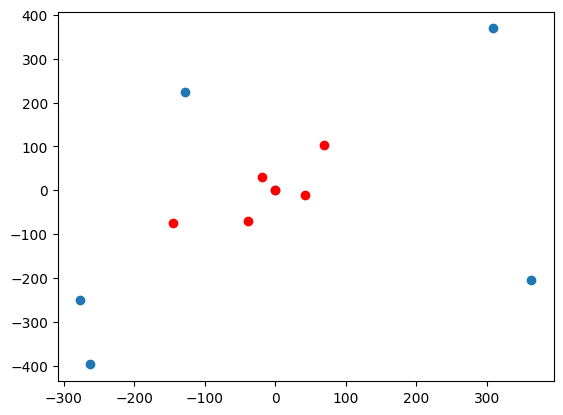

In [58]:
import matplotlib.pyplot as plt
plt.scatter(miner.morpher.cs_basis[:,0],miner.morpher.cs_basis[:,1])
plt.scatter(miner.morpher.basis[:,0],miner.morpher.basis[:,1],c="r")

In [59]:
np.linalg.cond(miner.morpher.calculate_morphing_matrix_2(miner.morpher.basis))

1874.955015808071

In [60]:
test = miner.morpher.basis

In [61]:
np.linalg.cond(miner.morpher.calculate_morphing_matrix_3(test))

26776.765091113175

In [62]:
test = miner.morpher.cs_basis

In [63]:
np.sqrt(np.sum(miner.morpher.compute_weight([0,0])**2))

1.0

In [64]:

miner.morpher.compute_weight([0,0])
miner.morpher.calculate_morphing_matrix_2(test)

[array([1., 0., 0., 0., 0., 0.]),
 array([ 9.26894582e-03, -2.31559594e+00,  5.78489147e+02, -2.56511977e+00,
         6.40825940e+02,  7.09880018e+02]),
 array([ 8.47051146e-03, -1.73837004e+00,  3.56758905e+02,  3.07599642e+00,
        -6.31274753e+02,  1.11702275e+03]),
 array([ 5.76408548e-03, -2.28954751e+00,  9.09429224e+02, -1.51233133e+00,
         6.00711845e+02,  3.96792528e+02]),
 array([6.10643928e-03, 2.25379984e+00, 8.31845450e+02, 1.88646453e+00,
        6.96267215e+02, 5.82786182e+02]),
 array([ 1.88105719e-02,  4.22436495e+00,  9.48682441e+02, -2.41270862e+00,
        -5.41831571e+02,  3.09462301e+02])]

In [65]:
sl = np.linalg.inv(miner.morpher.calculate_morphing_matrix_2(test*10))[1:6]

In [66]:
np.linalg.cond(sl[:,[1,2,3,4,5]])

7228.57707904857

In [67]:
np.linalg.cond(miner.morpher.calculate_morphing_matrix_3(test*10))

31262860.969938852

In [68]:
np.linalg.cond(np.linalg.inv(miner.morpher.calculate_morphing_matrix_2(test)))

2182.8659131776535

In [69]:
miner.morpher.basis

array([[   0.        ,    0.        ],
       [ -18.46428907,   29.37026308],
       [  42.33191869,  -11.44607874],
       [ -38.34153697,  -68.96555581],
       [-144.91793562,  -74.49737683],
       [  68.62260704,  103.80269138]])

In [70]:
np.linalg.cond(miner.morpher.calculate_morphing_matrix_3(test))

312629.32772016205

In [71]:
xs = _load_samples("data/generation_4/lhe_data_0.h5")[0]

(array([12893., 11181.,  9698.,  8288.,  7728.,  7938.,  8459.,  9529.,
        11287., 12999.]),
 array([-3.14159236e+00, -2.51327396e+00, -1.88495556e+00, -1.25663716e+00,
        -6.28318755e-01, -3.53567712e-07,  6.28318048e-01,  1.25663645e+00,
         1.88495485e+00,  2.51327325e+00,  3.14159165e+00]),
 <BarContainer object of 10 artists>)

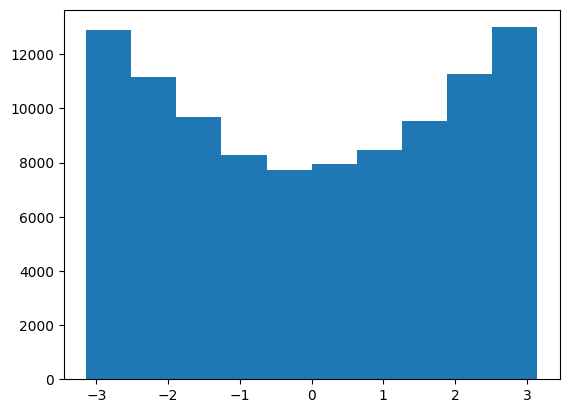

In [72]:
plt.hist(xs[:,2])

(array([23823., 13242., 14687., 15824., 11692.,  7922.,  5490.,  3658.,
         2389.,  1273.]),
 array([-2.05191898, -1.87560046, -1.69928205, -1.52296352, -1.34664512,
        -1.17032659, -0.99400806, -0.8176896 , -0.64137113, -0.46505266,
        -0.28873417]),
 <BarContainer object of 10 artists>)

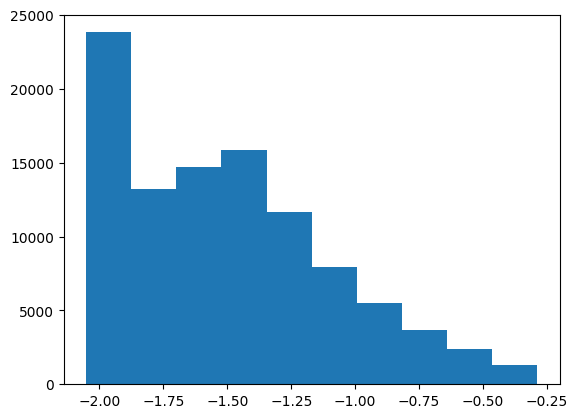

In [73]:
plt.hist(models[2].evaluate_log_likelihood_ratio(xs).detach().numpy())

In [74]:
import numpy as np

In [75]:
evaluated_ratio = []
evaluated_ratio.append(np.ones(np.shape(xs)[0]))
for j in range(5):
    evaluated_ratio.append(np.exp(models[j].evaluate_log_likelihood_ratio(xs).detach().numpy().flatten()))

In [76]:
mask = evaluated_ratio[5]>1
np.mean(
evaluated_ratio[0])

1.0

In [77]:
miner.morpher.cs_basis

array([[   0.        ,    0.        ],
       [-276.74342029, -249.82300956],
       [ 363.14175801, -205.22610098],
       [-262.37142632, -397.20915213],
       [ 308.93036785,  369.08576982],
       [-128.26343769,  224.57397771]])

In [78]:
miner.morpher.basis

array([[   0.        ,    0.        ],
       [ -18.46428907,   29.37026308],
       [  42.33191869,  -11.44607874],
       [ -38.34153697,  -68.96555581],
       [-144.91793562,  -74.49737683],
       [  68.62260704,  103.80269138]])

In [79]:
miner.morpher.reduced_sigma_morphing(miner.morpher.basis[5])

10.904206481970594

(array([2.257e+03, 4.740e+03, 4.525e+03, 3.969e+03, 3.258e+03, 2.866e+03,
        2.725e+03, 2.819e+03, 2.944e+03, 3.084e+03, 3.278e+03, 3.571e+03,
        3.550e+03, 3.553e+03, 3.374e+03, 3.196e+03, 2.964e+03, 2.782e+03,
        2.469e+03, 2.418e+03, 2.211e+03, 2.061e+03, 1.823e+03, 1.715e+03,
        1.586e+03, 1.477e+03, 1.389e+03, 1.318e+03, 1.177e+03, 1.140e+03,
        1.048e+03, 9.300e+02, 8.930e+02, 8.710e+02, 8.140e+02, 7.500e+02,
        7.590e+02, 6.840e+02, 6.130e+02, 6.160e+02, 6.140e+02, 4.950e+02,
        5.150e+02, 5.150e+02, 4.500e+02, 4.280e+02, 4.180e+02, 4.110e+02,
        4.290e+02, 3.770e+02, 3.420e+02, 3.240e+02, 3.300e+02, 3.040e+02,
        2.900e+02, 2.640e+02, 2.610e+02, 2.500e+02, 2.540e+02, 2.460e+02,
        2.010e+02, 2.180e+02, 2.080e+02, 2.040e+02, 1.900e+02, 1.960e+02,
        1.930e+02, 1.620e+02, 1.490e+02, 1.440e+02, 1.350e+02, 1.300e+02,
        1.510e+02, 1.390e+02, 1.170e+02, 1.150e+02, 1.140e+02, 1.100e+02,
        9.100e+01, 1.150e+02, 8.100e+0

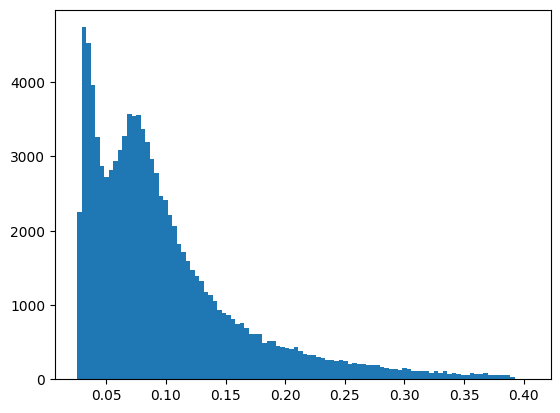

In [80]:
plt.hist(evaluated_ratio[4],bins=100)

In [81]:
cs = []
lin_spaces = [np.linspace(-200, 200, 50) for _ in range(2)]
meshgrids = np.meshgrid(*lin_spaces)
grid = np.vstack([meshgrid.flatten() for meshgrid in meshgrids]).T
for elem in grid:
    w = miner.morpher.compute_weight(elem)
    values = w@evaluated_ratio
    mask = values > 0
    values = values[mask]
    cs.append(np.mean(-2*np.log(values)))   

In [82]:
for elem in miner.morpher.basis:
    w = miner.morpher.compute_weight(elem)
    values = w@evaluated_ratio
    mask = values > 0
    values = values[mask]
    print(np.mean(-2*np.log(values)))   

0.0
1.3710695465515295
1.364535114123048
2.9970010204613162
4.982522284218989
3.8052073450509107


In [83]:
evaluated_ratio

[array([1., 1., 1., ..., 1., 1., 1.]),
 array([0.43783584, 0.6460378 , 0.42870817, ..., 0.76988727, 0.5642965 ,
        0.40799305], dtype=float32),
 array([0.4684155 , 0.35742   , 0.5689558 , ..., 0.5596027 , 0.43111432,
        0.5713096 ], dtype=float32),
 array([0.36643636, 0.16664803, 0.34485492, ..., 0.24457864, 0.1401723 ,
        0.34363863], dtype=float32),
 array([0.15496153, 0.06524041, 0.1585302 , ..., 0.12806626, 0.04068363,
        0.14463973], dtype=float32),
 array([0.1685878 , 0.16075994, 0.25064066, ..., 0.2360684 , 0.14481595,
        0.18207522], dtype=float32)]

In [84]:
print(miner.morpher.compute_weight(miner.morpher.basis[5]))

[-8.32667268e-17  3.05311332e-16  2.77555756e-17 -5.55111512e-17
  0.00000000e+00  1.00000000e+00]


[12.24489796  4.08163265]


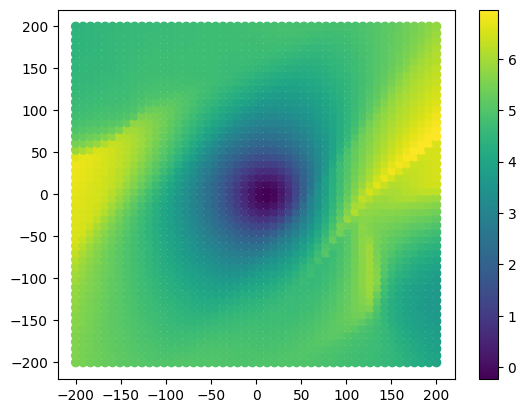

In [86]:
import matplotlib.pyplot as plt
plt.scatter(grid[:,0],grid[:,1],c = np.asarray(cs))
plt.colorbar()
plt.tricontour(grid[:,0], grid[:,1], cs, 15, linewidths=0.5, colors='k')
print(grid[np.argmin(cs)])

[0.7064493391040348, 0.6951133151942832, 0.6873946287299111, 0.6841947512181132, 0.6864484804581824, 0.6950593698480121, 0.7108241351353317, 0.7343609482730066, 0.7660582190135516, 0.8060547584021165, 0.8542515149175561, 0.9103453402834488, 0.9738712491556455, 1.0442417343451311, 1.1207768831994527, 1.2027240535989319, 1.2892690706002568, 1.3795422186762658, 1.4726223495587991, 1.5675418449422132, 1.6632943814804546, 1.7588466396475493, 1.8531543471977525, 1.9451823714102332, 2.033927986045633, 2.118445964110215, 2.197873820985887, 2.271455388456972, 2.3385609593399117, 2.398702501539803, 2.4515428676452466, 2.496898464184847, 2.5347354198427277, 2.5651598281897576, 2.5884030731202525, 2.6048035313970845, 2.6147860705347243, 2.6188407313605087, 2.6175018322641552, 2.6113284966555006, 2.600887329051814, 2.586737686318441, 2.569419737625947, 2.54944529774326, 2.527291261398557, 2.5033953615921263, 2.478153916409191, 2.451921208486075, 2.4250101492463503, 2.3976939071802055, 0.71985385163

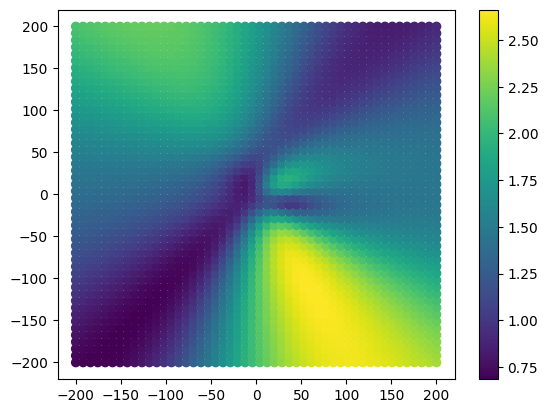

In [87]:
cs2 = []
lin_spaces = [np.linspace(-200, 200, 50) for _ in range(2)]
meshgrids = np.meshgrid(*lin_spaces)
grid = np.vstack([meshgrid.flatten() for meshgrid in meshgrids]).T
for elem in grid:
    w = miner.morpher.compute_weight(elem)
    cs2.append(np.sqrt(np.sum(w**2)))

print(cs2)
plt.scatter(np.asarray(grid)[:,0],np.asarray(grid)[:,1],c=cs2)
plt.colorbar()
plt.show()

In [38]:
for j in range(50000):
    base = []
    base.append([0,0])
    for h in range(5):
        base.append(np.random.uniform(-400,400,2))
    cond = (np.linalg.cond(miner.morpher.calculate_morphing_matrix(np.asarray(base))))
    if j == 0:
        best = cond
        best_basis = base
    else:
        if cond < best:
            best = cond
            best_basis = base
print(best)

25726.831134870514


In [39]:
miner.morpher.compute_weight_2([0,0],best_basis)

array([1., 0., 0., 0., 0., 0.])

In [45]:
cs2 = []
lin_spaces = [np.linspace(-200, 200, 10) for _ in range(2)]
meshgrids = np.meshgrid(*lin_spaces)
grid = np.vstack([meshgrid.flatten() for meshgrid in meshgrids]).T
for j in range(100):
    base = []
    base.append([0,0])
    for h in range(5):
        base.append(np.random.uniform(-400,400,2))
    for elem in grid:
        w = miner.morpher.compute_weight_2(elem,base)
        cs2.append(np.sqrt(np.sum(w**2)))
    worst_grid = np.max(cs2)
    cond = (np.linalg.cond(miner.morpher.calculate_morphing_matrix(np.asarray(base))))
    prop = worst_grid + cond
    if j == 0:
        loss = prop
        best_basis = base
    else:
        if prop < loss:
            best_basis = base
            loss = prop

[0.9380530962185729, 0.9514375696001743, 1.0421304429517795, 1.231651066525606, 1.473053838490123, 1.661322240415019, 1.7119836772043697, 1.6252149688234208, 1.4632967926361893, 1.2897355479582944, 1.0524046097117858, 1.0312457759932379, 1.0601861357657825, 1.2151099949833981, 1.5041751572701976, 1.7628256397470419, 1.8086333634687197, 1.6540453781049471, 1.430053325589614, 1.2300182820983836, 1.2148466420494402, 1.2106156916092128, 1.214782899043647, 1.30555324344251, 1.62519816565796, 2.0028717811384587, 2.0011748226427537, 1.7012429686400647, 1.39321916578651, 1.1784555515589044, 1.3508537662012416, 1.4097061336570693, 1.4859989655914587, 1.6065424247594808, 1.9637535975096883, 2.5917919469414215, 2.3393362728179685, 1.7326176081988243, 1.3435090256410411, 1.1402538342431705, 1.3620620062491122, 1.456462670968215, 1.6035881461960573, 1.8355508735438555, 2.1403054888563586, 3.31536896288175, 2.510454014935405, 1.6185731414658997, 1.2529484034979055, 1.0982347600021753, 1.196258864526

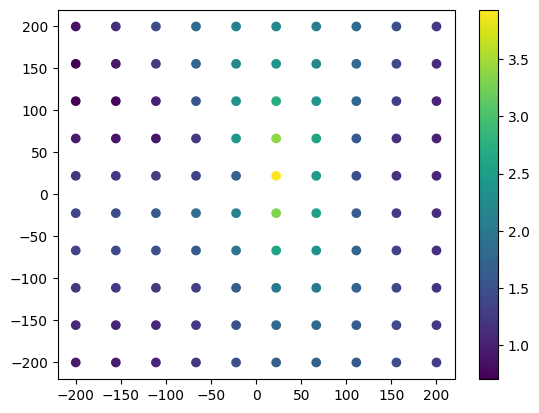

In [51]:
cs2 = []
lin_spaces = [np.linspace(-200, 200, 10) for _ in range(2)]
meshgrids = np.meshgrid(*lin_spaces)
grid = np.vstack([meshgrid.flatten() for meshgrid in meshgrids]).T
for elem in grid:
    w = miner.morpher.compute_weight_2(elem,miner.morpher.basis)
    cs2.append(np.sqrt(np.sum(w**2)))

print(cs2)
plt.scatter(np.asarray(grid)[:,0],np.asarray(grid)[:,1],c=cs2)
plt.colorbar()
plt.show()

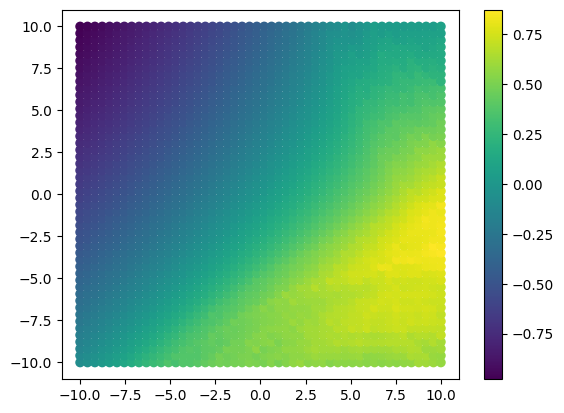

In [90]:
plt.scatter(grid[:,0],grid[:,1],c = cs)
plt.colorbar()

In [56]:
np.mean(-2*np.log(miner.morpher.compute_weight(miner.morpher.basis[1])@evaluated_ratio))

-0.06340610640329147

In [57]:
miner.morpher.basis

array([[ 0.        ,  0.        ],
       [-0.63670475,  8.60123674],
       [-9.61921089, -9.29498181],
       [ 9.73880901, -5.10325887],
       [ 7.22860267,  8.12380845],
       [-3.47022883,  1.7110983 ]])

In [85]:
evaluated_ratio[4]

array([1.0111225 , 1.0667189 , 0.9220651 , 0.99147713, 1.0608703 ,
       1.1010488 , 1.1264586 , 0.96333694, 1.0282875 , 1.0961281 ,
       1.1051614 , 1.0555687 , 1.0673664 , 1.0517914 , 0.99552757,
       0.97305036, 0.9897556 , 0.9953156 , 1.0092833 , 1.0771018 ,
       1.0296285 , 0.99347687, 0.9651839 , 1.0402552 , 1.0975643 ,
       1.0368987 , 1.1002167 , 0.8447281 , 1.0509437 , 1.0380676 ,
       0.9699639 , 1.0463914 , 1.0173435 , 0.9774697 , 1.0582881 ,
       1.0797402 , 0.9887232 , 0.9784946 , 1.0103894 , 1.0014583 ,
       1.0441669 , 0.96110046, 1.0392097 , 1.0602525 , 1.000877  ,
       0.9289506 , 1.0769582 , 1.0334934 , 0.9639208 , 0.99293715,
       1.0134692 , 0.92977405, 1.0446192 , 0.9938292 , 1.0266137 ,
       0.9817277 , 0.9595593 , 0.98490536, 1.011601  , 1.0206428 ,
       1.0674189 , 1.050998  , 1.0514966 , 1.0439866 , 0.97250897,
       0.9747042 , 1.0546024 , 1.0022203 , 1.0226784 , 1.0339936 ,
       0.9695923 , 1.0731515 , 1.0549382 , 0.9004447 , 1.02289